# Visualização de dados para tomada de decisão

![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1")

/home/barbarabarbosa/Envs/ds36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Será que o trabalho remoto impacta no tempo que um cientista passa coletando dados?

In [3]:
# Vamos ver as categorias da variável RemoteWork
df['RemoteWork'].value_counts()

Sometimes           2440
Rarely              1772
Never                823
Most of the time     684
Always               352
Don't know            26
Name: RemoteWork, dtype: int64

In [4]:
# Vamos ver as categorias da variável TimeGatheringData
df['TimeGatheringData'].value_counts()

30.0     1070
50.0     1054
20.0      985
40.0      967
10.0      610
60.0      603
0.0       464
70.0      347
25.0      258
80.0      187
35.0      174
15.0      153
5.0       144
45.0       96
65.0       82
55.0       65
75.0       63
90.0       61
100.0      34
85.0       16
1.0         7
95.0        6
2.0         6
33.0        5
3.0         4
8.0         4
7.0         4
12.0        3
28.0        3
34.0        3
         ... 
53.0        2
78.0        2
22.0        2
72.0        2
6.0         2
49.0        2
66.0        2
56.0        1
64.0        1
16.0        1
4.0         1
59.0        1
42.0        1
24.0        1
77.0        1
92.0        1
13.0        1
39.0        1
36.0        1
17.0        1
9.0         1
94.0        1
47.0        1
87.0        1
23.0        1
44.0        1
73.0        1
29.0        1
31.0        1
11.0        1
Name: TimeGatheringData, Length: 67, dtype: int64

In [7]:
df['TimeGatheringData'] = df['TimeGatheringData'].fillna(-1)

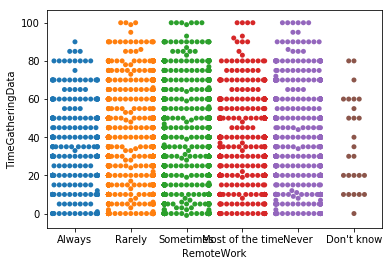

In [8]:
# Agora vamos usar o swarplot. Ele pode demorar um pouquinho...
sns.swarmplot(x="RemoteWork", y="TimeGatheringData", data=df)

Parece que não muda muito... 

### E se eu quiser saber se o tempo que a pessoa passa gerando visualizações impacta no tempo que ela gasta em visualização em um projeto?

In [10]:
# WorkDataVisualizations
df['WorkDataVisualizations'].value_counts()

10-25% of projects           1265
76-99% of projects           1255
100% of projects             1253
51-75% of projects           1160
26-50% of projects            918
Less than 10% of projects     868
None                          160
Name: WorkDataVisualizations, dtype: int64

In [13]:
# Agora vamos preencher os nulos com o valor 'NULL'
df['WorkDataVisualizations'] = df['WorkDataVisualizations'].fillna('NULL')
work_visualization = []
for s in df['WorkDataVisualizations']:
    work_visualization.append(re.sub(' of projects', '', s))
    
df['work_visualization'] = work_visualization

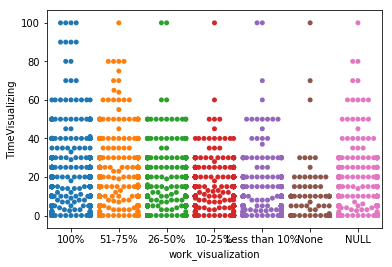

In [14]:
# Vamos verificar os novos valores mais limpos agora
_ = sns.swarmplot(x='work_visualization', y="TimeVisualizing", data=df,
             order=['100%', '51-75%', '26-50%', '10-25%', 
                    'Less than 10%', 'None', 'NULL'])

In [18]:
# Agora podemos fazer um swarplot de work_visualization com TimeVisualizing

### Desafio 3

Fazer um Heatmap mostrando a [correlação](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) dos tempos das etapas de um projeto de Data Science. 

São elas:

 - TimeGatheringData
 - TimeVisualizing
 - TimeModelBuilding
 - TimeFindingInsights
 - TimeProduction

Siga os passos [desse tutorial](https://seaborn.pydata.org/examples/many_pairwise_correlations.html). Atenção! Use apenas essas variáveis.

![crazy_finn](https://media.giphy.com/media/KI9oNS4JBemyI/giphy.gif)

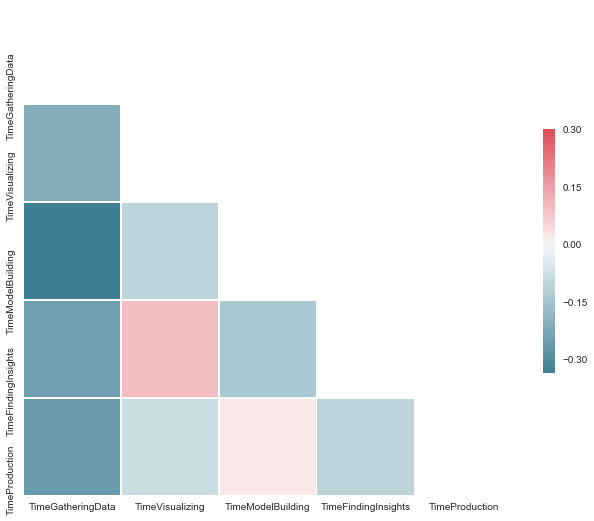

In [16]:
# Resolva o desafio aqui
import numpy as np

sns.set(style="white")

# Generate a large random dataset
d = df[['TimeGatheringData', 'TimeVisualizing', 'TimeModelBuilding', 
        'TimeFindingInsights', 'TimeProduction']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})